<a href="https://colab.research.google.com/github/michaelojy85/mojy85.github.io/blob/master/Hamoye_Stage_B_Lesson_Machine_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import package and that will be used in the entire notebook

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import statsmodels.api as sm

plt.rc('figure', figsize=(20,10)) #to make all my graphs the same size

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <b>LESSEON #1: Simple Linear Regression</b>


According to the United Nations Environmental Program (UNEP) Sustainable Buildings and Climate Initiative, construction trade contributes as much as 30% to all global greenhouse gas emissions and consumes up to 40% of all energy used worldwide. __[Climate change](https://hamoye.com/app/search/details/Q125928/climate%20change)__ is currently having a powerful impact on how buildings are designed and constructed.

Predicting numeric outcomes with some accuracy measure is an important facet of machine learning and __[data science](https://hamoye.com/app/search/details/Q2374463/data%20science)__. For this part, we will use a case study to understand linear regression and its associated cousins. We will learn about the assumptions behind linear regression, multiple linear regression, partial least squares and penalizations. We’ll also focus on strategies for measuring regression performance and implementations. 

In this module, we will develop a multivariate multiple regression model to study the effect of eight input variables on two output variables, which are the heating load and the cooling load, of residential buildings. The data provided is from the energy analysis data of 768 different building shapes. The features provided are the relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area and glazing area distribution. 

Data Source for content: __[UCI Machine Learning Repository: Energy efficiency Data Set](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)__ 

Data Quiz: __[UCI Machine Learning Repository: Appliances energy prediction Data Set](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)__

##Simple Linear Regression
###<b>The simple linear regression model.</b>

A simple linear regression model estimates the relationship between two quantitative variables where one is referred to as the independent variable and the other the dependent variable. The independent variable $(X)$ is used to predict and also called the predictor while the predicted variable is referred to as the response variable $(Y)$ (e.g. finding the relationship between the amount of $CO_2$ gas emitted and the number of trees cut down). The value of Y can be obtained from X by finding the line of best fit (regression line) with minimum error for the data points on a scatter plot for both variables. A simple linear regression can be represented as:


Where
>y = $\theta_0x$ + $\theta_1$

> $x$ is the independent variable

>$\theta_1$ is the intercept

>$\theta_0$ is the slope of the line of best fit

>$\theta_0$ and $\theta_1$are known as regression coefficients 	
 
__[The UCI Machine Learning Repository: Energy efficiency Data Set](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)__ is used in this module for better understanding of the concepts. We select a sample of the dataset and use the relative compactness column as the predictor and the heating load column the response variable.

In [ ]:
# Loading UCI Machine Learning Repository: Energy efficiency Data Set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
# Rename the columns of the dataset
columns_names = {'X1':'Relative_Compactness', 'X2':'Surface_Area', 
                  'X3':'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                  'X6': 'Orientation', 'X7': 'Glazing_Area', 
                  'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load',
                  'Y2': 'Cooling_Load'}  #Y1 and Y2 are the target variables
df = df.rename(columns=columns_names)
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
# finding the shape of the dataset
df.shape

(768, 10)

In [ ]:
# finding the correlation of the dataset
df.corr(method='pearson')

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
Glazing_Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing_Area_Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


In [ ]:
'''
columns: ['Relative_Compactness', 'Surface_Area', 
                 'Wall_Area', 'Roof_Area', 
                 'Overall_Height', 'Orientation', 
                 'Glazing_Area', 'Glazing_Area_Distribution']
'''
x_cols = list(df.columns[0:8])
y1_cols = df.columns[-2] # Heating_Load
y2_cols = df.columns[-1] # Cooling_Load

In [ ]:
'''
Add a constant. Essentially, we are adding a new column (equal in lenght to x), 
which consists only of 1s
'''
x = sm.add_constant(df[x_cols])

est1 = sm.OLS(df[y1_cols], x).fit()
est2 = sm.OLS(df[y2_cols], x).fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cooling_Load   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     859.1
Date:                Mon, 03 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:39:26   Log-Likelihood:                -1979.3
No. Observations:                 768   AIC:                             3975.
Df Residuals:                     760   BIC:                             4012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        97.2457     20.765      4.683      0.000      56.483     138.009
Relative_Compactness        -70.7877     11.225     -6.306      0.000     -92.824     -48.751
Surface_Area                 -0.0661      0.015     -4.519      0.000      -0.095      -0.037
Wall_Area                     0.0225      0.004      5.365      0.000       0.014       0.031
Roof_Area                    -0.0443      0.008     -5.404      0.000      -0.060      -0.028
Overall_Height                4.2838      0.369     11.618      0.000       3.560       5.008
Orientation                   0.1215      0.103      1.176      0.240      -0.081       0.324
Glazing_Area                 14.7171      0.888     16.573      0.000      12.974      16.460
Glazing_Area_Distribution     0.0407      0.076      0.534      0.594      -0.109       0.190
==============================================================================
Omnibus:                      104.668   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.547
Skew:                           0.767   Prob(JB):                     8.65e-51
Kurtosis:                       5.203   Cond. No.                     1.46e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#select a 15 samples of the dataset to analyse the relationships between Relative_Compactness and Cooling_Load.
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

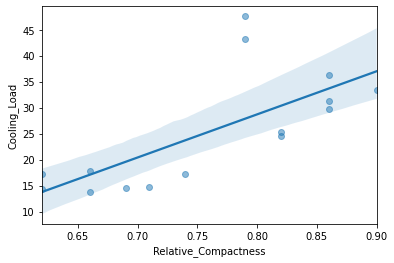

In [ ]:
#simple linear regression plot
sns.regplot(x='Relative_Compactness', y='Cooling_Load', 
            data=simple_linear_reg_df, scatter_kws={'alpha':0.5})

## Creating dummy dataset

In [ ]:
from sklearn.datasets import make_regression

X_dummy,y_dummy = make_regression(n_samples=768, n_features=8, 
                                  noise=25, n_targets=2, random_state=1)
dummy = pd.DataFrame(np.concatenate((X_dummy,y_dummy), axis=1))
dummy.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.826498,0.336491,0.461829,-0.125212,-0.500479,0.890586,-0.540387,0.856919,7.145854,14.921890
1,-0.259195,0.707294,2.614008,-0.184083,0.007701,-1.719392,0.388814,-0.684141,40.814140,-81.281527
2,0.049922,-0.292579,-0.299095,0.219477,0.815600,-0.282006,0.329490,-1.201156,-23.620922,28.706447
3,-2.277298,0.718291,-0.186955,-0.069625,1.291189,-0.116444,0.385602,0.353870,-25.778455,13.175249
4,-0.576148,0.480226,-0.035256,1.117410,1.039288,1.457876,1.818012,-0.821370,206.880539,272.670609


## Collinearity and Assumptions for Linear Regression


For better understanding, we explain the assumptions made by linear regression by comparing results on our energy efficiency dataset and a dummy linear dataset generated to have similar shape (same number of rows and column) as the energy efficiency dataset. Some assumptions made by linear regression
models about the data are:
1. **Linearity**: the relationship between the variables is linear such that a straight line is the line of best fit from the   regression plots above, we can see that the residuals of the dummy data are spread across the regression line as they should be to meet thelinearity assumption unlike the residuals of the energy efficiency dataset which are a bit farther from the regression line.

In [ ]:
# To create a linear regression model using sklearn to train the dataset 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# single variable for simple regression model
X_input = df[['Relative_Compactness']] # features / X-values
y_target = df['Cooling_Load'].values # targets / y-values

In [ ]:
from sklearn.preprocessing import StandardScaler

def TrainModel(features, targets, normalize=False):
    if normalize:
      scaler = StandardScaler()
      X_ = scaler.fit_transform(features)
    else:
      X_ = features

    return train_test_split(X_, targets, test_size=0.33, random_state=42)

In [ ]:
# A simple linear regression function that will train the data, displaying regression plot and return y_test and y_pred
def SimpleLinearRegression(features, targets, g_title=None):

    X_train, X_test, y_train, y_test = TrainModel(features, targets, 
                                                  normalize=False)

    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)  # fit training data 

    y_pred = regressor.predict(X_test) # predicted y values
    
    ax = sns.regplot(x=y_test,y=y_pred, scatter_kws={'alpha':0.5}) # regression plot
    ax.set(xlabel='Actual Values', ylabel='Predicted Values') # set x and y label
    ax.set_title(g_title) # set title

    print("Coefficient: {}".format(regressor.coef_)) # Coefficient of regressor model

    print("Residual sum of square: {}".format(r2_score(y_test, y_pred))) # Residual sum of square
    
    return y_test, y_pred

In [ ]:
from sklearn import metrics

def metricsCalculations(actual_test, predicted, n=3):
    # n = 3 round up in n decimal digits
    yt=np.array(actual_test)
    pv= np.array(predicted)

    # Mean Absolute Error
    mae = round(metrics.mean_absolute_error(actual_test, predicted), n) 
    # Residual Sum of Squares  
    rss = round(np.sum(np.square(yt - pv)), n)   
    # Mean Squared Error
    mse = round(metrics.mean_squared_error(actual_test, predicted), n) 
    # Root Mean Squared Error 
    rmse = round(np.sqrt(metrics.mean_squared_error(actual_test, predicted)), n)  
    # R-Squared 
    r2score = round(r2_score(actual_test, predicted), n)    

    print('Mean Absolute Error    :', mae)
    print('Residual Sum of Squares:', rss)  
    print('Mean Squared Error     :', mse)  
    print('Root Mean Squared Error:', rmse)
    print('R-Squared              :', r2score)

Coefficient: [57.40754257]
Residual sum of square: 0.3884706747082636


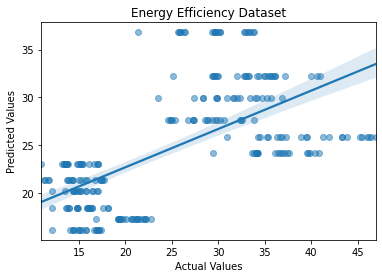

In [ ]:
y_test, y_pred = SimpleLinearRegression(X_input, y_target, 
                                        "Energy Efficiency Dataset")

Coefficient: [45.71536464 52.28162641 15.47495827 13.29367982 75.48606249 77.77547666
 54.06759732 27.10260204]
Residual sum of square: 0.9665475496997395


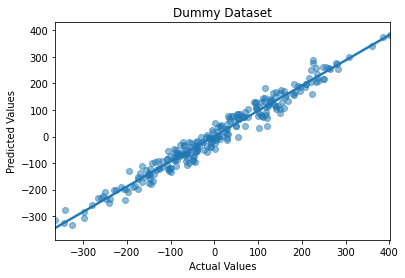

In [ ]:
y_dummy_test, y_dummy_pred = SimpleLinearRegression(X_dummy, y_dummy.T[1], 
                                                    "Dummy Dataset") # dummy dataset

2. **Homoscedasticity**: the residuals or prediction errors are of equal or constant variance.  The variance of the residuals for the dummy dataset appear to be uniform as opposed to the energy efficiency dataset which violates this assumption.

In [ ]:
def ResidualPlot(actual, predicted, title):
    residual_df = pd.DataFrame({'Actual':actual, 'Predict':predicted, 
                                'Residual':abs(actual)-abs(predicted)})
    sns.residplot(x=residual_df.index,  y=residual_df.Residual, 
                  scatter_kws={'alpha':0.5},
                  color="green").set_title(title)  # residual plot

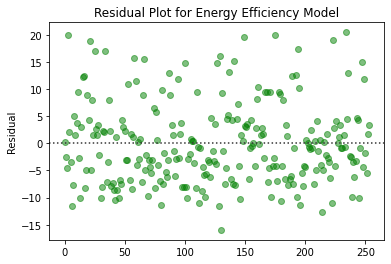

In [ ]:
ResidualPlot(y_test, y_pred, "Residual Plot for Energy Efficiency Model")

In [ ]:
metricsCalculations(y_test, y_pred, 5)

Mean Absolute Error    : 5.93114
Residual Sum of Squares: 14339.59313
Mean Squared Error     : 56.45509
Root Mean Squared Error: 7.51366
R-Squared              : 0.38847


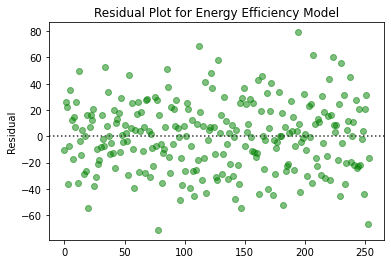

In [ ]:
ResidualPlot(y_dummy_test, y_dummy_pred, 
             "Residual Plot for Energy Efficiency Model")

In [ ]:
metricsCalculations(y_dummy_test, y_dummy_pred, 5)

Mean Absolute Error    : 21.71898
Residual Sum of Squares: 182176.39032
Mean Squared Error     : 717.22988
Root Mean Squared Error: 26.78115
R-Squared              : 0.96655


3. **Normality**: the residuals are of a normal distribution. The energy efficiency dataset flouts this assumption as the residuals are clearly not normally distributed while the dummy dataset has normally distributed residuals with the mean and median at 0.

In [ ]:
 def residualDistribution(features, targets, title=None):
    OLS_model = sm.OLS(targets, features).fit()  # training the model
    predicted_values = OLS_model.predict()  # predicted values
    residual_values = OLS_model.resid
    sns.distplot(residual_values.T).set_title(title)

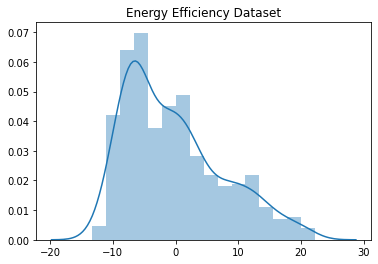

In [ ]:
residualDistribution(X_input, y_target, 
                     "Energy Efficiency Dataset") # actual dataset

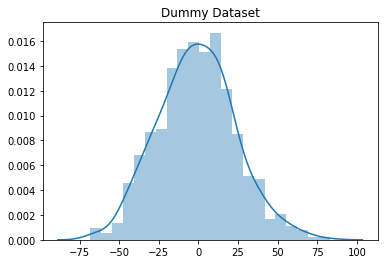

In [ ]:
residualDistribution(X_dummy, y_dummy.T[1], "Dummy Dataset") # dummy dataset

4. **Independence of the observations**

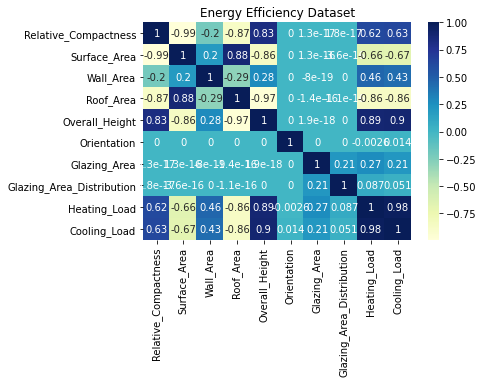

In [ ]:
sns.heatmap(df.corr(method='pearson'), 
            annot=True, 
            cmap="YlGnBu").set_title("Energy Efficiency Dataset"); # colleration values (heatmap) of actual dataset

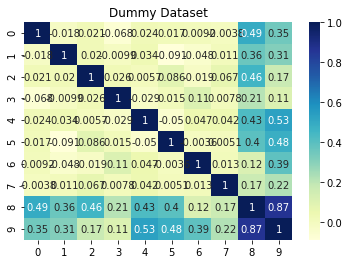

In [ ]:
sns.heatmap(dummy.corr(method='pearson'), 
            annot=True, 
            cmap="YlGnBu").set_title("Dummy Dataset"); # colleration values (heatmap) of dummy dataset

# **LESSON #2**: Multiple Linear Regression

Unlike simple linear regression, multiple linear regression establishes the relationship between the response variable and the predictors (usually two or more). In reality, several factors contribute to a certain outcome as opposed to just one as suggested by simple linear regression. Multiple linear regression has similar assumptions as simple linear regression and also assumes that there is no significant correlation between the predictors. While the relationship between variables can be linear, it allows for non-linear relationships that are not straight lines.

Y= $\theta_2$ + $\theta_1X_1$ + $theta_2X_2$ + . . .  +  $\theta_nX_n$ + ɛ

- Coefficients of multiple linear regression

In [ ]:
#multi-variables for multiple regression model
all_inputs = df[x_cols].values # features/ X-values
all_targets = df[['Heating_Load', 'Cooling_Load']].values # targets / y-values

In [ ]:
# A multiple linear regression function that will train the data, displaying regression plot and return y_test and y_pred
def MultipleLinearRegression(features, targets, g_title=None):

    X_train, X_test, y_train, y_test = TrainModel(features, targets)

    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)  # fit training data 

    y_pred = regressor.predict(X_test) # predicted y values

    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    ax = sns.regplot(x='Actual',y='Predicted', data=df_results,
                     scatter_kws={'alpha':0.5}) # regression plot
    
    ax.set(xlabel='Actual Values', ylabel='Predicted Values') # set x and y label
    ax.set_title(g_title) # set title

    print("Residual sum of square: {}".format(r2_score(y_test, y_pred))) # Residual sum of square
    print("Coefficient: {}".format(regressor.coef_)) #coefficient of the regression model

    return y_test, y_pred

Residual sum of square: 0.9159352998210062
Coefficient: [-6.35206253e+01  7.47003702e+11 -7.47003702e+11 -1.49400740e+12
  4.12199497e+00 -5.06528951e-02  1.97584575e+01  2.52564073e-01]


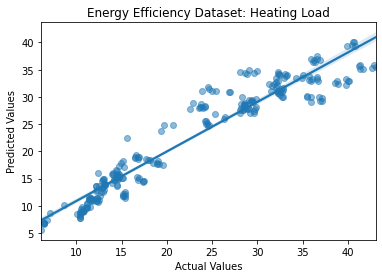

In [ ]:
y_test, y_pred = MultipleLinearRegression(all_inputs, 
                                          all_targets.T[0], 
                                          "Energy Efficiency Dataset: Heating Load")  # actual dataset

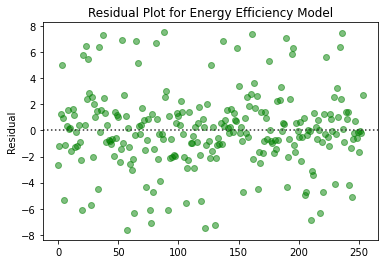

In [ ]:
ResidualPlot(y_test, y_pred, "Residual Plot for Energy Efficiency Model")

Residual sum of square: 0.8892202230112425
Coefficient: [-7.19948454e+01  5.59645389e+11 -5.59645389e+11 -1.11929078e+12
  4.12489223e+00  8.43455410e-02  1.41479052e+01  6.08676076e-02]


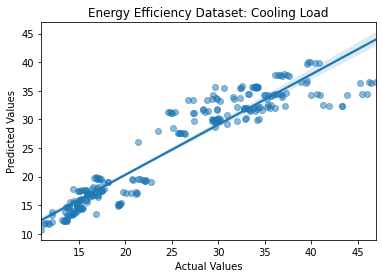

In [ ]:
y_test, y_pred = MultipleLinearRegression(all_inputs, 
                                          all_targets.T[1], 
                                          "Energy Efficiency Dataset: Cooling Load")  # actual dataset

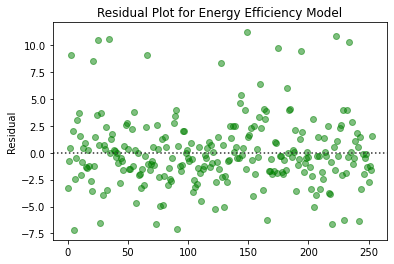

In [ ]:
ResidualPlot(y_test, y_pred, "Residual Plot for Energy Efficiency Model")

##Collinearity 

Correlation is a measure used to describe the linear relationship between two variables. Correlation values range from -1 for a perfect negative correlation (an increase in one variable causes a decrease in the other variable) to +1 for a perfect positive correlation (both variables increase or decrease together). A correlation value of 0 indicates that there is absolutely no correlation between both variables. A situation where two or more of the predictors have a strong correlation is known as multicollinearity. Since predictors are expected to be independent, when multicollinearity occurs, the correlated variables cannot independently contribute to predicting the value of the response variable. In addition, not all the predictors included are relevant in obtaining better results from the model. Adding more independent variables to the model is not always better instead, it might only make the model more complicated. To resolve this, one of the correlated predictors is selected and the other removed from the data.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

def RecursiveFeatureElimination(cols_x, cols_y):
  #Feature Selection for Cooling Load
  model = ExtraTreesRegressor(criterion='mae')
  rfe = RFE(model, 4)
  fit = rfe.fit(df[cols_x], df[cols_y])

  cols = []

  for boolean, col in zip(fit.support_, cols_x):
      if boolean:
          cols.append(col)

  print("Number of Features: ", fit.n_features_)
  print("Selected Features: ", fit.support_)
  print("Feature Ranking: ", fit.ranking_) 
  print("Selected Feature: ", cols)

  return cols

In [ ]:
x_cool_cols = RecursiveFeatureElimination(x_cols, y2_cols)

Number of Features:  4
Selected Features:  [False  True False  True  True False  True False]
Feature Ranking:  [3 1 2 1 1 5 1 4]
Selected Feature:  ['Surface_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']


In [ ]:
x_heat_cols = RecursiveFeatureElimination(x_cols, y1_cols)

Number of Features:  4
Selected Features:  [ True False  True False  True False  True False]
Feature Ranking:  [1 3 1 2 1 5 1 4]
Selected Feature:  ['Relative_Compactness', 'Wall_Area', 'Overall_Height', 'Glazing_Area']


Residual sum of square: 0.8841280244269472
Coefficient: [ 0.04236362 -0.04302429  5.59755842 14.64125964]


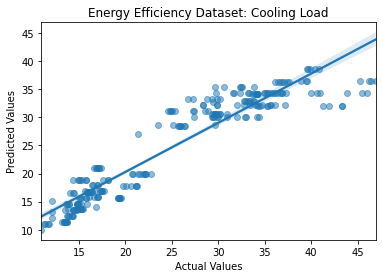

In [ ]:
x_cool_feature = df[x_cool_cols].values
x_cool_target = df[y2_cols].values

y_test, y_pred = MultipleLinearRegression(x_cool_feature, 
                                          x_cool_target, "Energy Efficiency Dataset: Cooling Load")  # actual dataset

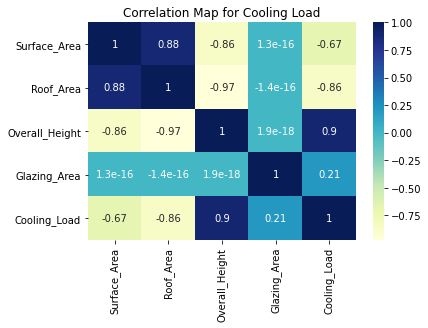

In [ ]:
x_cool_cols.append(y2_cols)
sns.heatmap(df[x_cool_cols].corr(method='pearson'), 
            annot=True, 
            cmap="YlGnBu").set_title("Correlation Map for Cooling Load"); # colleration values (heatmap) of actual dataset

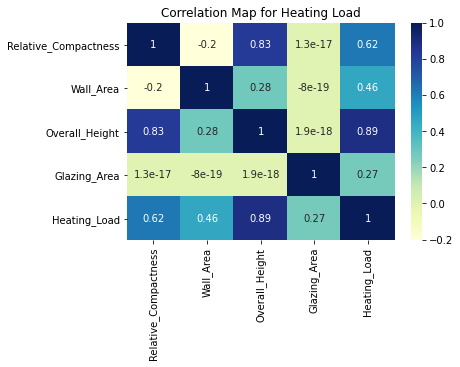

In [ ]:
x_heat_cols.append(y1_cols)
sns.heatmap(df[x_heat_cols].corr(method='pearson'), 
            annot=True, 
            cmap="YlGnBu").set_title("Correlation Map for Heating Load"); # colleration values (heatmap) of actual dataset

Residual sum of square: 0.9665475496997395
Coefficient: [45.71536464 52.28162641 15.47495827 13.29367982 75.48606249 77.77547666
 54.06759732 27.10260204]


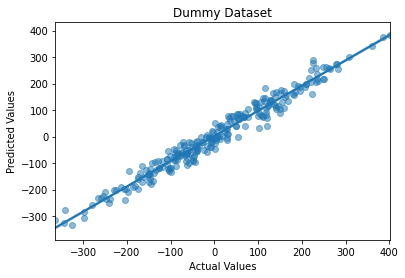

In [ ]:
y_test, y_pred = MultipleLinearRegression(X_dummy, y_dummy.T[1], "Dummy Dataset")  # dummy dataset

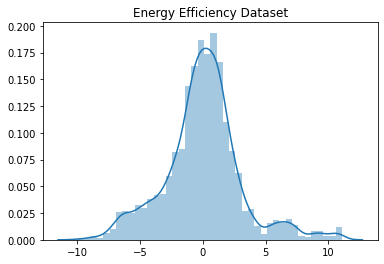

In [ ]:
residualDistribution(all_inputs, all_targets, "Energy Efficiency Dataset") # actual dataset

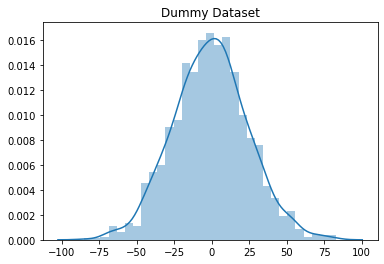

In [ ]:
residualDistribution(X_dummy, y_dummy, "Dummy Dataset") # dummy dataset

## Polynomial Regression

A polynomial regression model is considered a linear regression model that can be used when a curvilinear relationship exists between the predictors and the response variable. It can be represented as $Y$ = $\theta_0$ + $\theta_1X$ + $\theta_2X_2$ + . . .  +  $\theta_nX_n$ + ɛ, for a single independent variable where $n$ is the degree of the polynomial and Y is a linear function of $\theta$. Depending on the task and data, there might be multiple predictors in a polynomial regression model which results in more interactions in the model. As expected, the complexity in the model increases as the degree increases.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm

# A polynomial regression function that will generate the SVR score and plot a regression plot
def PolynomialRegression(features, targets, deg=1, reg=1, g_title=None):

    X_train, X_test, y_train, y_test = TrainModel(features, targets)

    svr_score = 0 

    for i in range(1, deg,1):
      for j in range (1, reg,1):
          svm_poly_clf = svm.SVR(kernel='poly', degree=i, C=j).fit(X_train, y_train)
          score = svm_poly_clf.score(X_test, y_test)

          if svr_score < score:
            svr_score, d, r = score, i, j

    y_pred = svm_poly_clf.predict(X_test) # predicted y values

    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    ax = sns.regplot(x='Actual',y='Predicted', scatter_kws={'alpha':0.5},
                     data=df_results, order=d) # regression plot
    
    ax.set(xlabel='Actual Values', ylabel='Predicted Values') # set x and y label
    ax.set_title(g_title) # set title

    print("Polynomial Degree: {}".format(d))
    print("Reguralizatin (C): {}".format(r))
    print("SVR Score: {}".format(svr_score))

Polynomial Degree: 7
Reguralizatin (C): 19
SVR Score: 0.8319172019412236


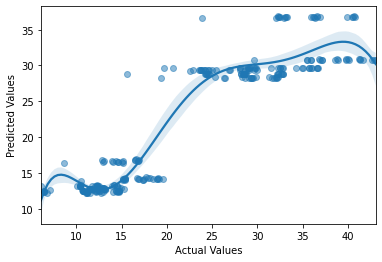

In [ ]:
PolynomialRegression(all_inputs, all_targets.T[0], deg=8, reg=20)

Polynomial Degree: 7
Reguralizatin (C): 19
SVR Score: 0.8180395521169082


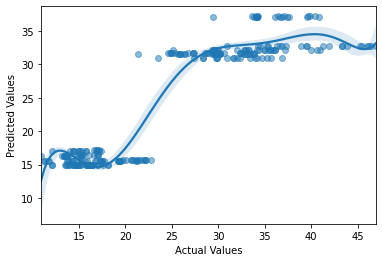

In [ ]:
PolynomialRegression(all_inputs, all_targets.T[1], deg=8, reg=20)

# **LESSON #3**: Measuring Regression Performance

### Evaluation Metrics for performance (RSS, R-Squared, RMSE, MAE etc)
How well a regression model performs can be obtained by how close the predicted value is to the ground truth. It is very important to use the appropriate metric to evaluate the performance. In this section, we discuss some examples of metrics used in evaluating regression models such as RSS, R-Squared, RMSE and MAE

In [ ]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler

minMax = MinMaxScaler()
normalised_df = pd.DataFrame(minMax.fit_transform(df), columns=df.columns)
feature_df = normalised_df.drop(columns=['Heating_Load','Cooling_Load'])
heating_target = normalised_df.Heating_Load
cooling_target = normalised_df.Cooling_Load

var_train, var_test, res_train, res_test = train_test_split(feature_df, heating_target, 
                                       test_size=0.3, random_state=1)

regr = LinearRegression()  
regr.fit(var_train, res_train)  # fit training data 

predicted_heat_values = regr.predict(var_test)


### **Mean Absolute Error (MAE)**

MAE  is easy and intuitive such that it calculates the sum of the  average of the absolute error between the predicted values and the true values. Since the absolute difference is taken, this metric does not consider direction. However, because the absolute difference is obtained, it is unable to give information about the model overshooting or undershooting. The smaller the MAE is, the better the model. Therefore, if the MAE is 0, the model is perfect and accurately predicts results which is almost impossible.  The mean absolute error is more robust to outliers


\begin{array}{rrl}
\frac{\href{1}{1}}{n}\sum_{i}^{\href{sample_size}{}}|y_i-\hat{y_i}| \\
\end{array}


###### where y<sub>i</sub> = true value

###### $\hat{y}$<sub>i</sub> = predicted value

### **Residual Sum of Squares (RSS)**

Also known as the sum of squared residuals (SSR), this metric explains the variance in the representation of the dataset by the model; it measures how well the model approximates the data. A residual is the estimated error made by a model. In simpler terms, it is the difference between the nth true value and the nth predicted value by the model. RSS is the sum of the square of errors between the residuals in a model. The lower the RSS, the better the model’s estimations and vice versa.

\begin{array}{rrl}
\text{Residual sum of Squares (RSS)} & = & \sum_{i=1}^{\href{sample_size}{N}}(\href{residual}{residual})^2 \\
RSS & = & \sum_{i=1}^{\href{sample_size}{N}}(\href{residual}{e_i})^2 \\
RSS & = & \sum_{i=1}^{\href{sample_size}{N}}(Y_i-\hat{Y_i})^2 \\
\end{array}

### **Root Mean Square Error (RMSE)**

This is the same as the mean square error (MSE) but, it is the square root of the MSE that estimates the standard deviation of the residuals. It describes the spread of the residuals from the line of best fit and the noise in the model. When the RMSE is low, it means that the error made by the model has a small deviation from the true values. It is calculated by summing the squares of the residuals and dividing by the number of observations.

\begin{array}{rrl}
\text{Root mean squared error (RMSE|RMSD)} & = & \sqrt{\frac{\displaystyle \sum_{i=1}^N (Y_i-\hat{Y_i})^2}{N}} \\
\end{array}

### **R-Squared**

Also known as the coefficient of determination, r-squared is a metric used in regression to determine the goodness of fit of the model. With values ranging from 0 to 1, It gives information on the percentage of the response variable  explained by the model. Mostly, the higher the value, the better the model however, this is not necessarily always true.

\begin{array}{rrl}
R^2 & = & 1 - \frac{\href{RSS}{RSS}}{TSS} \\
TSS & = & \sum^N_{i=0} (y_i - \bar{y})^2 \\
RSS & = & \sum_{i=1}^{\href{sample_size}{N}}(Y_i-\hat{Y_i})^2 \\
\end{array}

###### where SS<sub>res</sub> = residual sum of squares = RSS
###### SS<sub>tot</sub> = Total sum of squares = TSS
###### $\bar{y}$ = mean of the observed data

In [ ]:
metricsCalculations(res_test, predicted_heat_values)

Mean Absolute Error    : 0.063
Residual Sum of Squares: 1.823
Mean Squared Error     : 0.008
Root Mean Squared Error: 0.089
R-Squared              : 0.893


## Model complexity, Underfitting and	Overfitting
Model complexity refers to the number of input features used to train a model and the algorithmic learning complexity. An overly complex model can be
difficult to interpret, prone to overfitting and also require more computing. When creating models, it is imperative for the model to generalise well enough
to make reasonable predictions on new and unseen data. An overfit model will perform well on the training data and poorly on unseen data. While a model
is required to learn the actual relationship of the variables in the training set, an overfit model memorises the training set, fits the noise, outliers and
irrelevant information, then makes predictions based on this noise which is incorrect. On the other hand, when a model is too simple, it can be as a result of
having very few features not sufficient enough to learn details and relationships in the data. In a later section, we will discuss methods that can be used to
achieve optimal and acceptable model complexities while avoiding overfitting and underfitting.
## The	Bias-Variance	tradeoff
Bias and variance are common occurrences in machine learning and there is a constant struggle to achieve low bias and variance. Bias is a measure of
correctness of a model i.e. how far off is a model from being correct? While high bias results in an increase in the error by making assumptions which
prevent the model from capturing relevant relationships between the predictors and response variable, low bias gives lower error and also prevents
underfitting by capturing important relationships. On the other hand, variance tells how much the values estimated by a model will vary across different
training data. When the variance is low, it means that there is only a small change in the estimate of the model with new training data. A high variance
causes overfitting such that the changes in estimates obtained with new training data is large because the model is so complex that it has now learnt
patterns from one training data such that it cannot generalise to other training sets. While it is essential to obtain low bias and low variance, it is almost
impossible to achieve this simultaneously which is where the ‘bias-variance tradeoff’ occurs.

# LESSON #4: Penalization Methods

## Regulating over- and under-fitting

Regularization is a method used to make complex models simpler by penalising coefficients to reduce their magnitude, variance in the training set and in turn, reduce overfitting in the model. Regularization occurs by shrinking the coefficients in the model towards zero such that the complexity term added to the model will result in a bigger loss for models with a higher complexity . There are two types of regression techniques such as Ridge and Lasso regression.

### **Ridge** **Regression**

Also known as L2 Regularisation, this is a technique that uses a penalty term to shrink the magnitude of coefficients towards zero without eliminating them. The shrinkage prevents overfitting caused by the complexity of the model or  collinearity. It includes the square magnitude of the coefficients to the loss function as the penalty term.  If the error is defined as the square of residual, when a L2 regularization term is added, the  result is the equation below.

\begin{array}{rrl}
& \text{Loss with L2 regularisation} & = & Error(y,\hat{y}) +  \lambda{\displaystyle \sum_{i}^n {w_i}^2}
\end{array}

###### *where w = weight of coefficients*

###### *$\lambda$ = regularization parameter*

As lambda increases, the penalty increases causing more coefficients to shrink in the same vein, if lambda is zero, it results in the loss function.

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(var_train, res_train)
round(np.sqrt(metrics.mean_squared_error(res_test, 
                                         lasso_reg.predict(var_test))), 3)   # Root Mean Squared Error

0.091

## Feature Selection, The LASSO Regression and Elastic Net
### **Feature Selection and Lasso Regression**

Some datasets can be high dimensional with a very high number of features and some of them not contributing towards predicting the response variable. As a result, it becomes more computationally expensive to train a model and can also introduce noise causing the model to perform poorly. The process of selecting significant features that contribute the most in obtaining high performing models is known as feature selection. Lasso regression (Least Absolute Shrinkage and Selection Operator) reduces overfitting of the dataset by penalising the coefficients such that some coefficients are shrunk to zero and, indirectly performs feature selection by selecting only a subset of features leaving only relevant variables that minimize prediction errors. By using L1 regularisation, it includes the absolute value of the magnitude to the loss function. The application of L1 regularisation (Lasso regression)  results in simpler and sparse models that allow for better interpretation. Although lasso regression helps prevent overfitting, one major limitation is that it does not consider other factors when eliminating predictors. For example, it arbitrarily  eliminates a variable from a correlated pair which might not be a good rational from a human perspective. When a L1 regularization term is added, the  result is the equation below.

\begin{array}{rrl}
& \text{Loss with L1 regularisation} & = & Error(y,\hat{y}) +  \lambda{\displaystyle \sum_{i}^n |{w_i}|}
\end{array}

In [ ]:
ridge_reg = Ridge(alpha=0.001)
ridge_reg.fit(var_train, res_train)
round(np.sqrt(metrics.mean_squared_error(res_test, 
                                         ridge_reg.predict(var_test))), 3)   # Root Mean Squared Error

0.089

In [ ]:
elasticNet_reg = ElasticNet(alpha=0.001)
elasticNet_reg.fit(var_train, res_train)
round(np.sqrt(metrics.mean_squared_error(res_test, 
                                         elasticNet_reg.predict(var_test))), 3)   # Root Mean Squared Error

0.091

In [ ]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this fucntion returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(regr, var_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, var_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, var_train, 'Lasso_Weight')
elasticNet_weights_df = get_weights_df(elasticNet_reg, var_train, 'Elastic_Weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights = pd.merge(final_weights, elasticNet_weights_df, on='Features')

final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight,Elastic_Weight
0,Surface_Area,-6.387091e+12,-0.233988,0.000000,0.000000
1,Relative_Compactness,-6.064125e-01,-0.604573,-0.027719,-0.069218
2,Orientation,-2.822876e-03,0.003399,0.000000,0.000000
3,Glazing_Area_Distribution,1.913548e-02,0.028453,0.021431,0.024931
4,Glazing_Area,2.295933e-01,0.215034,0.206132,0.208971
5,Overall_Height,3.852539e-01,0.393931,0.463482,0.487470
6,Wall_Area,3.725803e+12,0.019404,0.200087,0.183070
7,Roof_Area,4.790318e+12,-0.327077,-0.000000,-0.000000


### **Elastic Net Regression**

This is simply **a combination of the L1 and L2 penalties** from ridge and lasso regression. This method arose from the need to overcome the limitations of lasso regression. It regularizes and performs feature selection simultaneously by initially finding the optimal values of the coefficients as in ridge then performs a shrinkage.

# LESSON #5: Non-Linear Regression Methods and Other Recommendations

## Model Tuning and choosing parameters
Machine learning models are parameterized such that there has to be a search for the combination of parameters that will result in the optimal performance of the model. The parameters that define the model architecture are referred to as hyperparameters while the process of exploring a range of values is called hyperparameter tuning. It is important to note the distinction between model parameters and hyperparameters. Unlike hyperparameters, model parameters are learnt during the training phase while setting hyperparameters is exclusive of the training process. Ideally, when hyperparameter tuning is completed, the result is the best parameters for the model. Grid search and random search are two common strategies for tuning hyperparameters. 

### **Grid Search**

Grid search explores the combination of a grid of parameters such that for every combination of parameters, a model is built and evaluated then the model with the best result selected and its corresponding parameters. While it is computationally expensive, setting up a grid search is quite easy.

In [ ]:
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import RandomForestRegressor

var_cool_train, var_cool_test, res_cool_train, res_cool_test = TrainModel(feature_df, cooling_target)

rfr = RandomForestRegressor()

param_grid = {
    'bootstrap'         : [True],
    'criterion'         : ['mse', 'mae'],
    'max_depth'         : [80, 90, 100, 110, 120],
    'max_features'      : [5, 6, 7, 8],
    'min_samples_leaf'  : [4, 5, 6, 7],
    'min_samples_split' : [8, 10, 12],
    'n_estimators'      : [100, 200, 300, 400, 500]
}# Create a based model

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(var_cool_train, res_cool_train)

print("Best Estimator              : {}".format(grid_search.best_estimator_))
print("Best Cross-Validation-Score : {}".format(grid_search.best_score_))
print("Best Parameters             : {}".format(grid_search.best_params_))
print("Best Index                  : {}".format(grid_search.best_index_))

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 6841 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done 7934 tasks      | elapsed: 63.2min
[Parallel(n_jobs=-1)]: Done 9109 tasks      | 

Best Estimator              : RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best Cross-Validation-Score : 0.9611129201247157
Best Parameters             : {'bootstrap': True, 'criterion': 'mse', 'max_depth': 90, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 300}
Best Index                  : 312


### Random Search

As opposed to grid search, random search randomly combines parameter values in the grid to build and evaluate models. It does not sequentially combine all parameters as in grid search instead, it allows for a quick exploration of the entire action space to reach optimal values.

In [ ]:
param_distributions = {
    'bootstrap'         : [True, False],
    'criterion'         : ['mse', 'mae'],
    'max_depth'         : [80, 90, 100, 110, 120],
    'max_features'      : [4, 5, 6, 7, 8],
    'min_samples_leaf'  : [3, 4, 5, 6, 7],
    'min_samples_split' : [8, 10, 12],
    'n_estimators'      : [100, 200, 300, 400, 500]
}# Create a based model

random_search = RandomizedSearchCV(estimator = rfr, 
                                    param_distributions = param_distributions, 
                                    cv = 5, n_jobs = -1, verbose = 2)
random_search.fit(var_cool_train, res_cool_train)

print("Best Estimator              : {}".format(random_search.best_estimator_))
print("Best Cross-Validation-Score : {}".format(random_search.best_score_))
print("Best Parameters             : {}".format(random_search.best_params_))
print("Best Index                  : {}".format(random_search.best_index_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   24.7s finished


Best Estimator              : RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best Cross-Validation-Score : 0.9602825847703897
Best Parameters             : {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 8, 'max_depth': 100, 'criterion': 'mse', 'bootstrap': False}
Best Index                  : 0


## Data splitting, resampling and cross validation strategy
Data splitting in data science involves setting aside a portion of the dataset for testing (out of sample or hold-out) and evaluating the performance of the model to provide unbiased results while the rest is used in fitting the model. The proportion of division is solely based on choice and sometimes, the size of the dataset. However a common practice is to split the dataset into training, validation or dev and testing sets where the validation set is used to tune the hyperparameters to select the best values for the model. Resampling involves repeatedly selecting samples from the original dataset and using these samples to obtain more information about the model. This can create different samples of the training set and another for evaluation. Cross validation is a method used to generalise and prevent overfitting in machine learning